# 6.2 Exploring relationships

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Import data
df = pd.read_csv(r'C:\Users\kater\Desktop\DATA IMMERSION\ACHIEVEMENT 6\archive\All data sets.csv', index_col= False)

In [3]:
#Create path
path = r'C:\Users\kater\Desktop'

### 2. Data Cleaning

In [4]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [5]:
df.shape

(782, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 782 non-null    int64  
 1   Country                              782 non-null    object 
 2   Happiness Rank                       782 non-null    int64  
 3   Happiness Score                      782 non-null    float64
 4   GDP per Capita                       782 non-null    float64
 5   Family                               782 non-null    float64
 6   Life Expectancy                      782 non-null    float64
 7   Freedom                              782 non-null    float64
 8   Perceptions of Goverment Corruption  781 non-null    float64
 9   Generosity                           782 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [7]:
df.dtypes

Year                                     int64
Country                                 object
Happiness Rank                           int64
Happiness Score                        float64
GDP per Capita                         float64
Family                                 float64
Life Expectancy                        float64
Freedom                                float64
Perceptions of Goverment Corruption    float64
Generosity                             float64
dtype: object

In [8]:
#Descriptive statistics
df.describe()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000
mean,2016.993606,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.125436,0.218576
std,1.417364,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.105816,0.122321
min,2015.000000,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.054000,0.130000
50%,2017.000000,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.091000,0.201982
75%,2018.000000,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.156030,0.278832
max,2019.000000,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [9]:
df.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom',
       'Perceptions of Goverment Corruption', 'Generosity'],
      dtype='object')

#### Missing values check

In [10]:
#Checking missing values
df.isnull().sum()

Year                                   0
Country                                0
Happiness Rank                         0
Happiness Score                        0
GDP per Capita                         0
Family                                 0
Life Expectancy                        0
Freedom                                0
Perceptions of Goverment Corruption    1
Generosity                             0
dtype: int64

No action required

#### Duplicates check

In [11]:
#Check for duplicates
df_dups = df[df.duplicated()]

In [12]:
df_dups.shape

(0, 10)

No duplicates were found

#### Mixed-type data

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

C:\Users\kater\AppData\Local\Temp\ipykernel_15064\3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kater\AppData\Local\Temp\ipykernel_15064\3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kater\AppData\Local\Temp\ipykernel_15064\3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kater\AppData\Local\Temp\ipykernel_15064\3630298113.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\kater\AppData\Local\Temp\ipykernel_15064\3630298113.py:2: F

No mixed_type data were found

### 3. Creating  a Correlation Matrix Heatmap 


In [14]:
#Create a subsection without "country" column to create matrix heatmap
df1 = df[['Happiness Rank', 'Happiness Score', 'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom',  'Perceptions of Goverment Corruption', 'Generosity']]

In [15]:
#Create a correlation matrix using pandas
df1.corr()

,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
Happiness Rank,1.000000,-0.992066,-0.794791,-0.644842,-0.743655,-0.537942,-0.372781,-0.117713
Happiness Score,-0.992066,1.000000,0.789284,0.648799,0.742456,0.551258,0.398418,0.137578
GDP per Capita,-0.794791,0.789284,1.000000,0.585966,0.784338,0.340511,0.306307,-0.014560
Family,-0.644842,0.648799,0.585966,1.000000,0.572650,0.420361,0.126401,-0.037262
Life Expectancy,-0.743655,0.742456,0.784338,0.572650,1.000000,0.340745,0.250512,0.010638
Freedom,-0.537942,0.551258,0.340511,0.420361,0.340745,1.000000,0.459593,0.290706
Perceptions of Goverment Corruption,-0.372781,0.398418,0.306307,0.126401,0.250512,0.459593,1.000000,0.318920
Generosity,-0.117713,0.137578,-0.014560,-0.037262,0.010638,0.290706,0.318920,1.000000


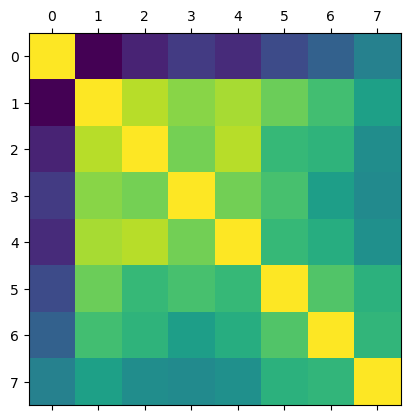

In [16]:
# Create a correlation heatmap using matplotlib
plt.matshow(df1.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

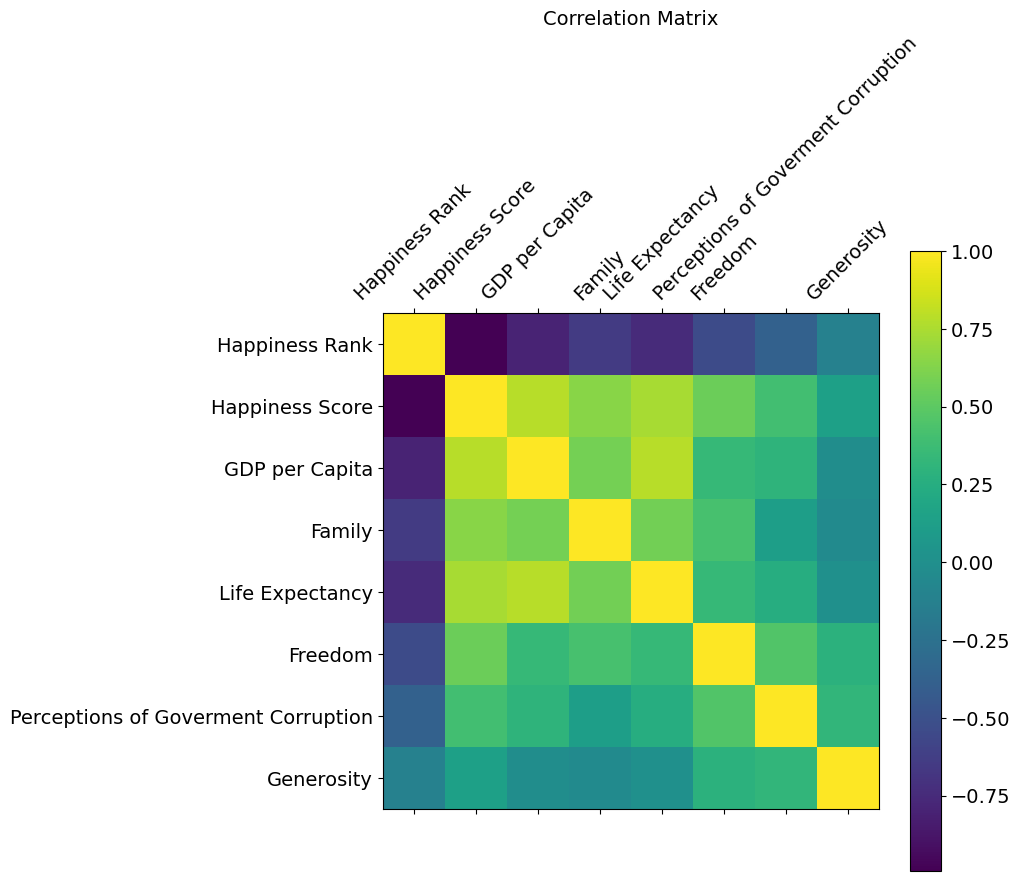

In [17]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend 
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

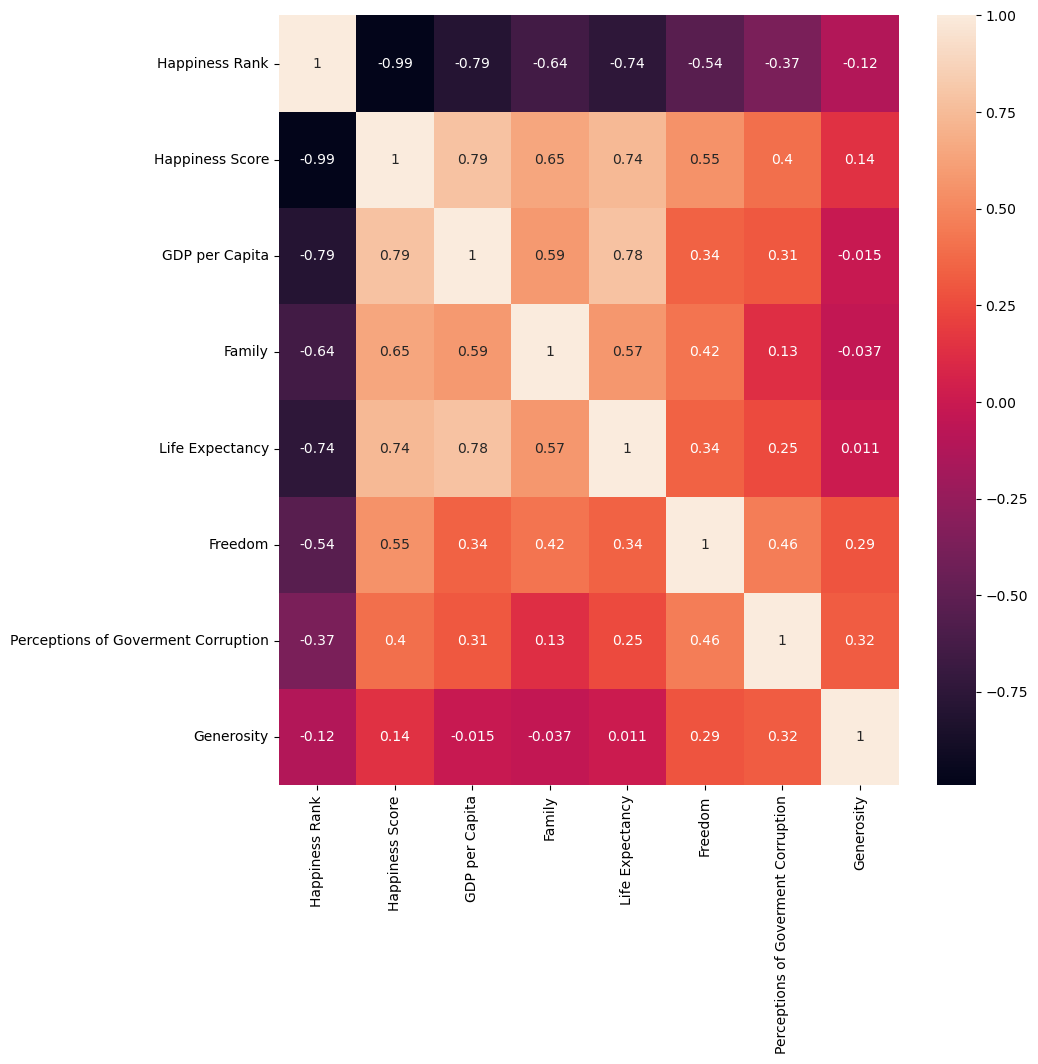

In [18]:
# Create the correlation heatmap in seaborn
f,ax = plt.subplots(figsize=(10,10))
corr = sns.heatmap(df1.corr(), annot = True, ax = ax) 

There is a strong correlation between happiness score and happines rank, wich makes sense because higher the score is, higher the rank will be. The correlation between generosity and perception of governmrnt corruption is week compared to other variables.

### 4. Creating a Scatterplot


C:\Users\kater\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


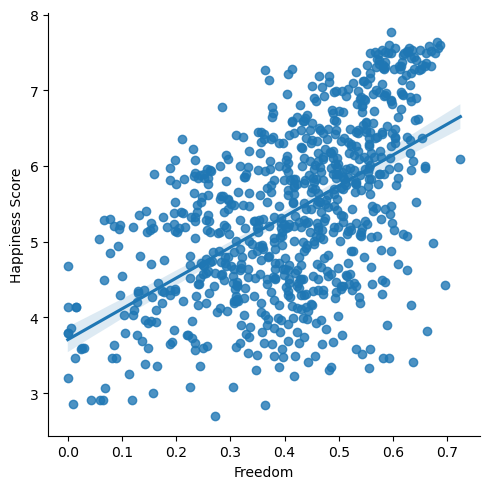

In [19]:
#Create a scatterplot for the "house age" and "price per unit" columns in seaborn
sns.lmplot(x = 'Freedom', y = 'Happiness Score', data = df)

The scatterplots illustrate strong correlations between freedom and happiness score (bigger the freedom, higher the happiness score)

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


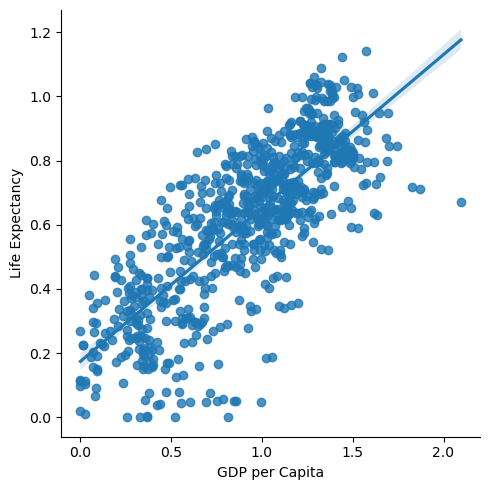

In [20]:
#Create a scatterplot for the "house age" and "price per unit" columns in seaborn
sns.lmplot(x = 'GDP per Capita', y = 'Life Expectancy', data = df)

The scatterplot illustrate strong correlations between life expectancy and GDP per capita (higher the GDP per capita, higher the life expectancy)

### 5. Creating a Pair Plot

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

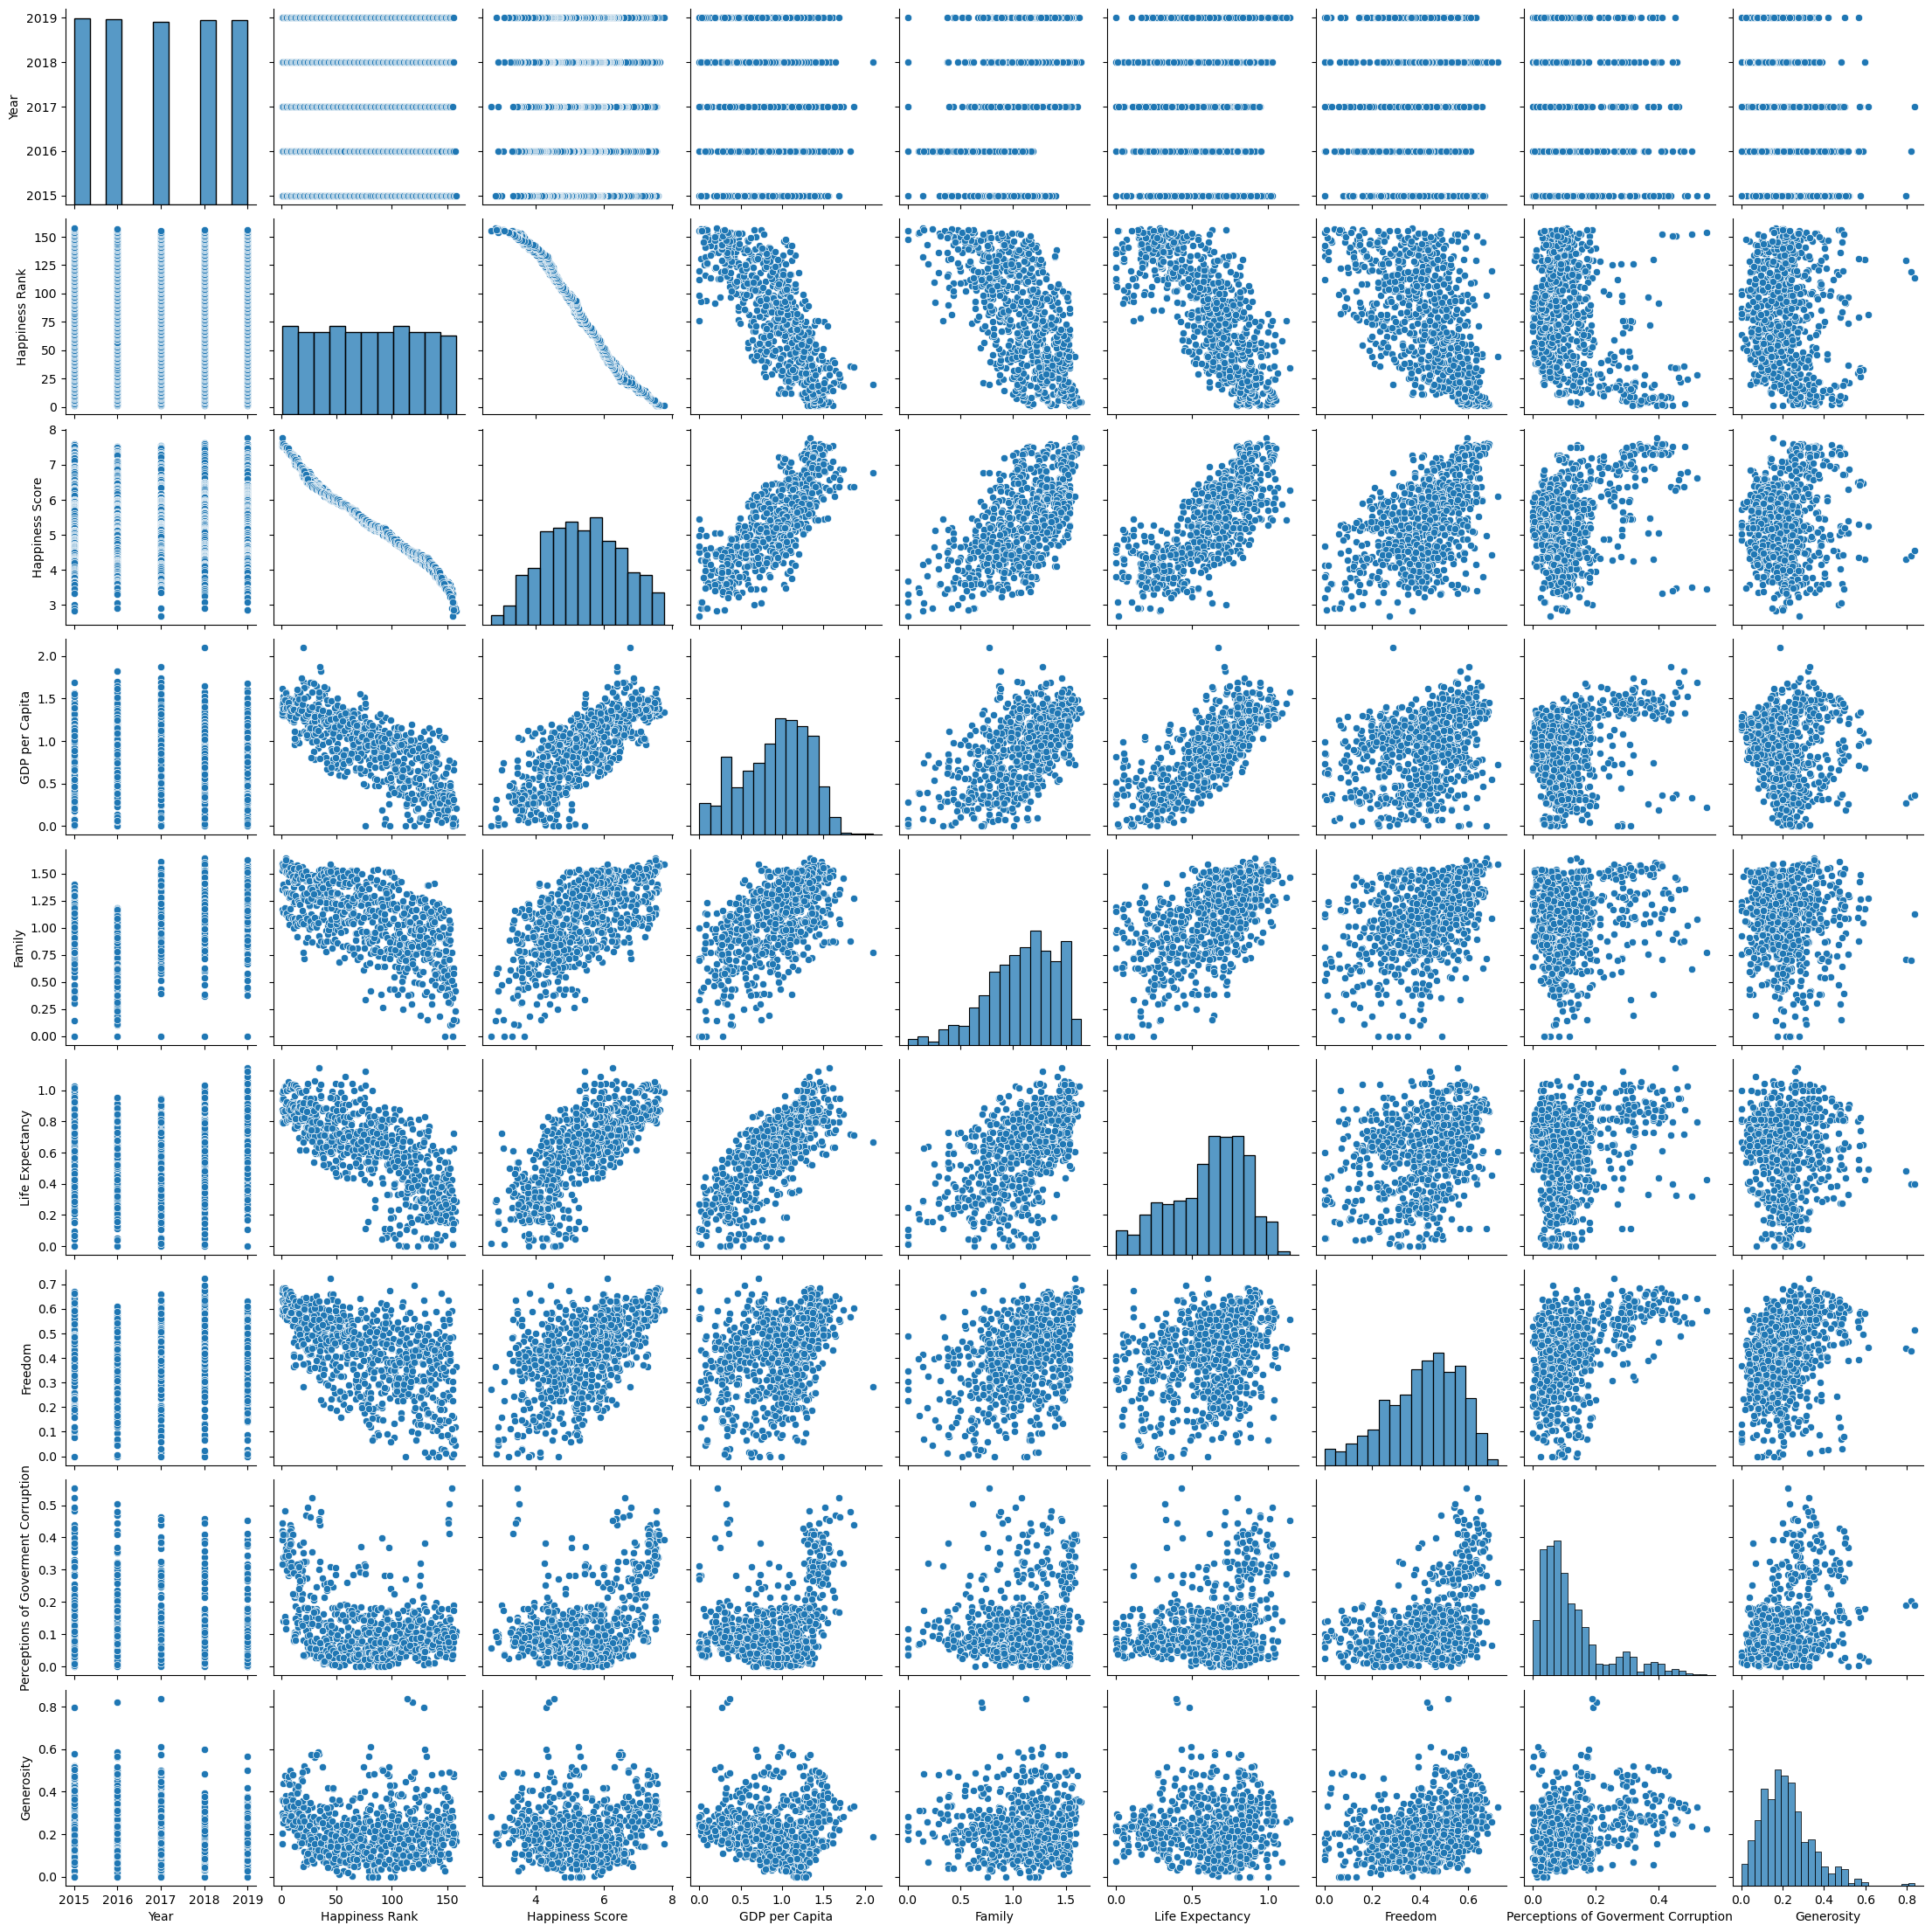

In [21]:
#Create a pair plot of the entire data set
g = sns.pairplot(df)

In [22]:
#Create smaller subsection to see the strongest correlations
df2 = df[['Happiness Score', 'Family', 'Freedom', 'Life Expectancy']]

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


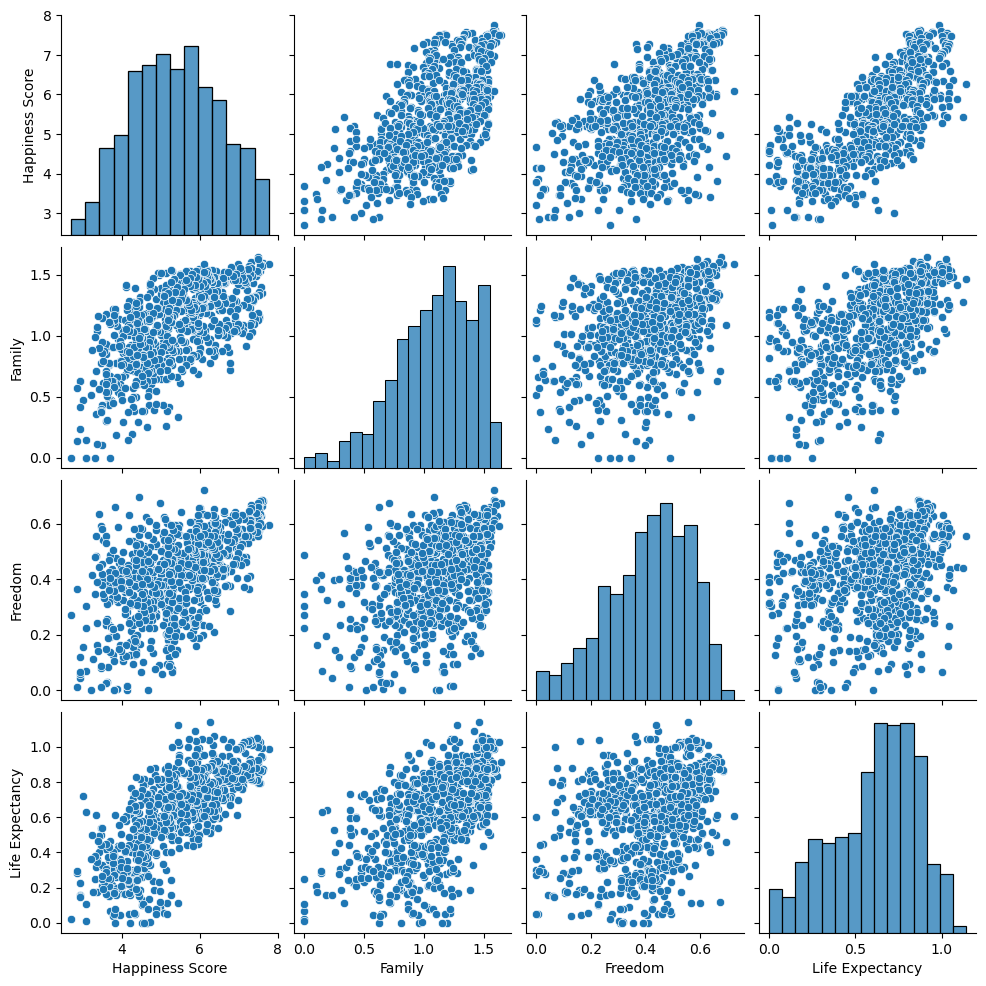

In [23]:
#Create a pair plot of the subsection
g = sns.pairplot(df2)

The plots show strong correlations between all variables.

### 5. Creating Categorical Plot

##### Creating a categorical variable that splits the "Happiness Score" column into categories

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Count'>

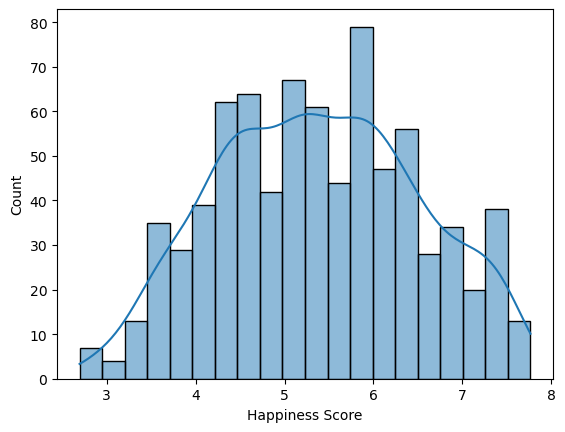

In [24]:
sns.histplot(df['Happiness Score'], bins = 20, kde = True)

In [25]:
# Creating score category for categorical plot
df.loc[df['Happiness Score'] < 4, 'Score category'] = 'Low'

C:\Users\kater\AppData\Local\Temp\ipykernel_15064\2133627553.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['Happiness Score'] < 4, 'Score category'] = 'Low'


In [26]:
df.loc[(df['Happiness Score'] >= 4.1) & (df['Happiness Score'] < 5.5), 'Score category'] = 'Medium'


In [27]:
df.loc[df['Happiness Score'] > 5.5 , 'Score category'] = 'High'

In [28]:
df['Score category'].value_counts(dropna = False)

Score category
High      356
Medium    319
Low        96
NaN        11
Name: count, dtype: int64

In [29]:
df.columns

Index(['Year', 'Country', 'Happiness Rank', 'Happiness Score',
       'GDP per Capita', 'Family', 'Life Expectancy', 'Freedom',
       'Perceptions of Goverment Corruption', 'Generosity', 'Score category'],
      dtype='object')

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

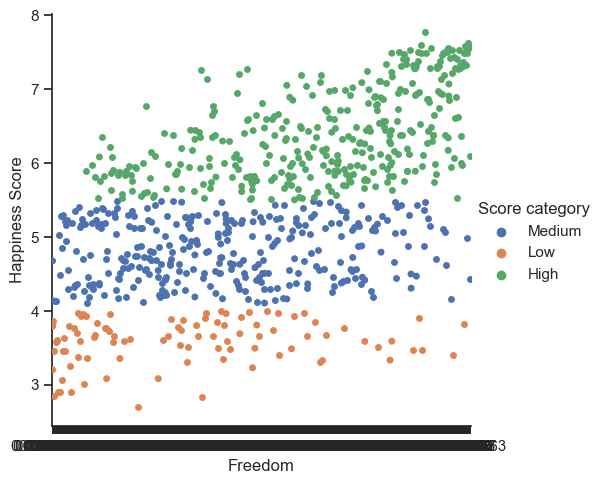

In [30]:
#Create a categorical plot in seaborn using the happiness score categories created above
sns.set(style="ticks")
g = sns.catplot(x="Freedom", y="Happiness Score", hue="Score category", data=df)

This categorical plot doesn't show any outliers. We can see that bigger the freedom, hihger the happiness score

### Answers to the questions from previous task

1.Is there any correlation between freedom and happiness score?
We can see in the scatterplot a strong correlations between freedom and happiness score (bigger the freedom, higher the happiness score)
2.Is there correlation between GDP per capita and life expectancy?
There is a strong correlation between life expectancy and GDP per capita (higher the GDP per capita, higher the life expectancy)

### Defining hypotheses

Hypothesis 1: If a country has a high GDP per capita and a high freedom, the happiness score will be high. Null hypothesis- If a country has a high GDP per capita and a high freedom, the happiness score will be low. 

Hypothesis 2: Freedom has a strong impact on happiness score. Null hypothesis - Freedom doesn't have a strong impact on happiness score.

Hypothesis 3: Family has a strong impact on happiness score. Null hypothesis - Family doesn't have a strong impact on happiness score.